Scroll past the code, to the bottom of the page, for a set of plots showing the expected value of maximum bets and likelihood of victory in a two-payer race of various lengths. Because Player 2 is the last to act, the expected value charts are based on a bet by Player 2. Some intuitive consequences of the format are apparent, such as the value of a two-space lead being greater in a shorter race. Each race is simulated 10,000 times, which is sufficient to closely approximate the probabilities. This could be expanded into races with a greater number of players, or different formats, such as the steeplechase.

In [35]:
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
from IPython.core.pylabtools import figsize

In [13]:
def r_2( length, p1_lead, p2_lead, p1_bet, p2_bet ):
    
    #p1_lead = int(raw_input("Player 1 head start? ")) #enter parameters as raw input
    #p2_lead = int(raw_input("Player 2 head start? "))
    #p1_bet = int(raw_input("Player 1 bet?  $"))
    #p2_bet = int(raw_input("Player 2 bet?  $"))
    
    p1_wins = 0 
    p2_wins = 0
    
    final_pos_list = []
    
    sims = 10000
    
    for n in range (sims):                         #number of simulations
        
        p1_pos = p1_lead                           #keeps track of player position (initialized as lead)
        p2_pos = p2_lead
        
        while p1_pos < length and p2_pos < length: #regular game play starts here
            p1_roll = (np.random.randint(1,6)) + (np.random.randint(1,6))    #individual rolls for each player
            p2_roll = (np.random.randint(1,6)) + (np.random.randint(1,6))
            p1_pos += p1_roll
            p2_pos += p2_roll
            
        final_pos = (p1_pos, p2_pos)
        final_pos_list.append(final_pos)
        
        if final_pos[0] >= final_pos[1]:
            p1_wins += 1
        else:
            p2_wins += 1
            
    p1_per = (float(p1_wins) / float(sims)) * 100
    p2_per = (float(p2_wins) / float(sims)) * 100
    
    p1_p1_ev = ((length+p1_bet)*(p1_per/100)) - (p1_bet * (p2_per/100))
    p1_p2_ev = (p1_bet * (p2_per/100))
    
    p2_p2_ev = ((length+p2_bet)*(p2_per/100)) - (p2_bet * (p1_per/100))
    p2_p1_ev = (p2_bet * (p1_per/100))
    
    results = (p1_lead,p2_lead,p1_bet,p2_bet,p1_p1_ev,p1_p2_ev,p2_p2_ev,p2_p1_ev,p1_per,p2_per)
    return results
    
    
    
    
    #print "The expected winning percentage of Player 1 is " + str(p1_per) + "%"
    #print "The expected winning percentage of Player 2 is " + str(p2_per) + "%"
    
    #print "The expected value of Player 1 betting on herself is $" + str(p1_p1_ev)
    #print "The expected value of Player 1 betting on Player 2 is $" + str(p1_p2_ev)
    #print "The expected value of Player 2 betting on herself is $" + str(p2_p2_ev)
    #print "The expected value of Player 2 betting on Player 1 is $" + str(p2_p1_ev)
    
            
    

In [23]:
def raceSim():
    players = int(raw_input("How many players? "))
    length = int(raw_input("How long is the race? "))
    p1_lead = int(raw_input("Player 1 lead? "))
    p2_lead = int(raw_input("Players 2 lead? "))
    p1_bet = int(raw_input("Player 1 bet? "))
    p2_bet = int(raw_input("Player 2 bet? "))
                  
    if (players) == 2:
        r_2(length,p1_lead,p2_lead,p1_bet,p2_bet)
    elif players == 3:
        r_3(length)
    elif players == 4:
        r_4(length)
    else:
        print "Please enter 2,3, or 4"
        raceSim_r()       
    

In [64]:
p1_ev_list = []
p2_ev_list  = []
p1_lead_list = []
p2_lead_list = []
p1_bet_list = []
p2_bet_list = []
sim_list = []

for l in range (0,13):
    for m in range (0,13):
        for n in range (0,36):
            for o in range (0,36):
                results = r_2(35,l,m,n,o)
                sim_list.append(results)
                


In [54]:
def r_2_plots(N):
    ev_list_self = []
    ev_list_p1 = []
    p1_lead_list = []
    p1_per_list = []
    p2_per_list = []

    for i in range(-8,9):
        p1_lead_list.append(i)
        ev = r_2(N,i,0,N,N)
        ev_list_self.append(ev[6])
        ev_list_p1.append(ev[7])
        p1_per_list.append(ev[8])
        p2_per_list.append(ev[9])
    
    return [ev_list_self, ev_list_p1, p1_lead_list, p1_per_list, p2_per_list]

<function matplotlib.pyplot.tight_layout>

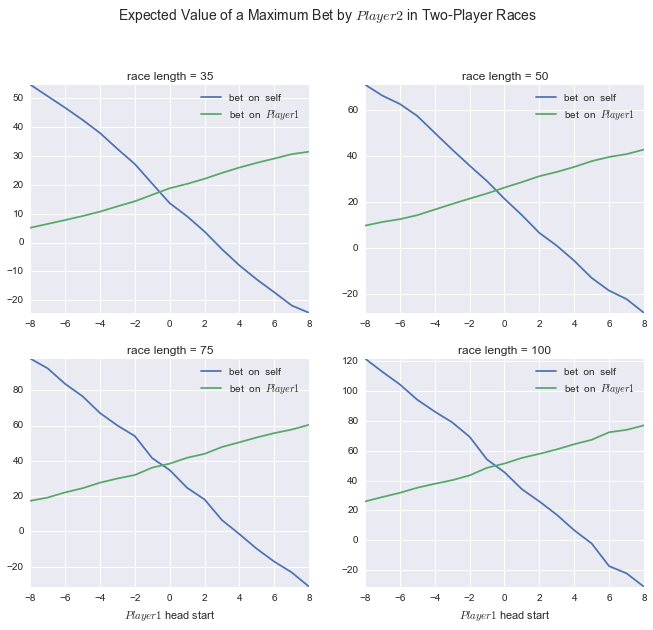

In [62]:
figsize(11, 9)

race_length = [35, 50, 75, 100]

for k, N in enumerate(race_length):
    sx = plt.subplot(len(race_length) / 2, 2, k + 1)
    plt.xlabel("$Player 1$ head start") \
        if k in [len(race_length)-2, len(race_length) - 1] else None    
    plt.title("race length = %d" % (N))
    plt.setp(sx.get_yticklabels(), visible=True)
    data = r_2_plots(N)
    x = data[2]
    y1 = data[0]
    y2 = data[1]
    plt.plot(x, y1, x, y2, label = "expected value of a max bet by $Player 2$")
    #plt.vlines(0, -15, 120, color="k", linestyles="--", lw=1)
    
    leg = plt.legend(['bet  on  self', 'bet  on  $Player 1$'])
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)
    
plt.suptitle("Expected Value of a Maximum Bet by $Player 2$ in Two-Player Races",
            y=1.02,
            fontsize=14)

plt.tight_layout




The y-axis for the first set of graphs is the expected value in dollars of

<function matplotlib.pyplot.tight_layout>

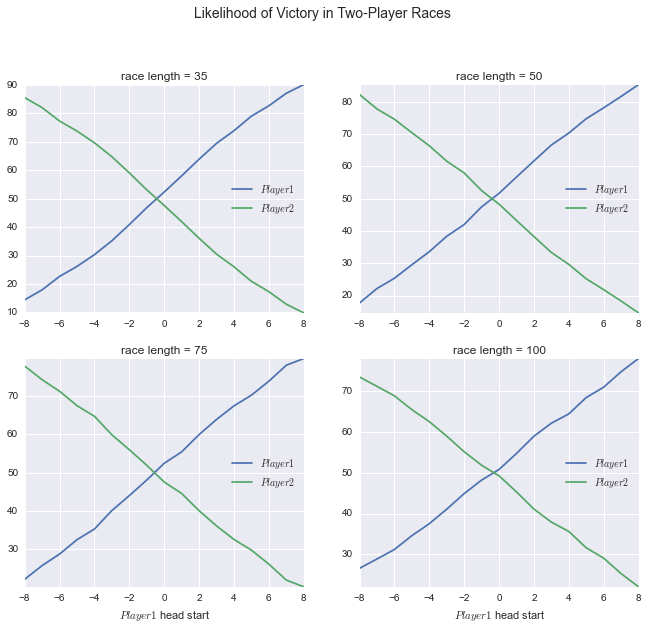

In [61]:
figsize(11, 9)

race_length = [35, 50, 75, 100]

for k, N in enumerate(race_length):
    sx = plt.subplot(len(race_length) / 2, 2, k + 1)
    plt.xlabel("$Player 1$ head start") \
        if k in [len(race_length)-2, len(race_length) - 1] else None    
    plt.title("race length = %d" % (N))
    plt.setp(sx.get_yticklabels(), visible=True)
    data = r_2_plots(N)
    x = data[2]
    y1 = data[3]
    y2 = data[4]
    plt.plot(x, y1, x, y2, label = "expected value of a max bet by $Player 2$")
    #plt.vlines(0, -15, 120, color="k", linestyles="--", lw=1)
    
    leg = plt.legend(['$Player 1$', '$Player 2$'],loc = 7)
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)
    
plt.suptitle("Likelihood of Victory in Two-Player Races",
            y=1.02,
            fontsize=14)

plt.tight_layout